#1. Neurones artificiels - un bref aperçu des débuts de l'apprentissage automatique

Cherchant à comprendre le fonctionnement du cerveau biologique afin de concevoir une intelligence artificielle (IA), Warren McCulloch et Walter Pitts ont publié le premier concept d'une cellule cérébrale simplifiée, le neurone dit McCulloch-Pitts (MCP), en 1943 (A Logical Calculus of the Ideas Immanent in Nervous Activity by W. S. McCulloch and W. Pitts, Bulletin of Mathematical Biophysics, 5(4) : 115-133, 1943).
Les neurones biologiques sont des cellules nerveuses interconnectées dans le cerveau qui sont impliquées dans le traitement et la transmission de signaux chimiques et électriques.
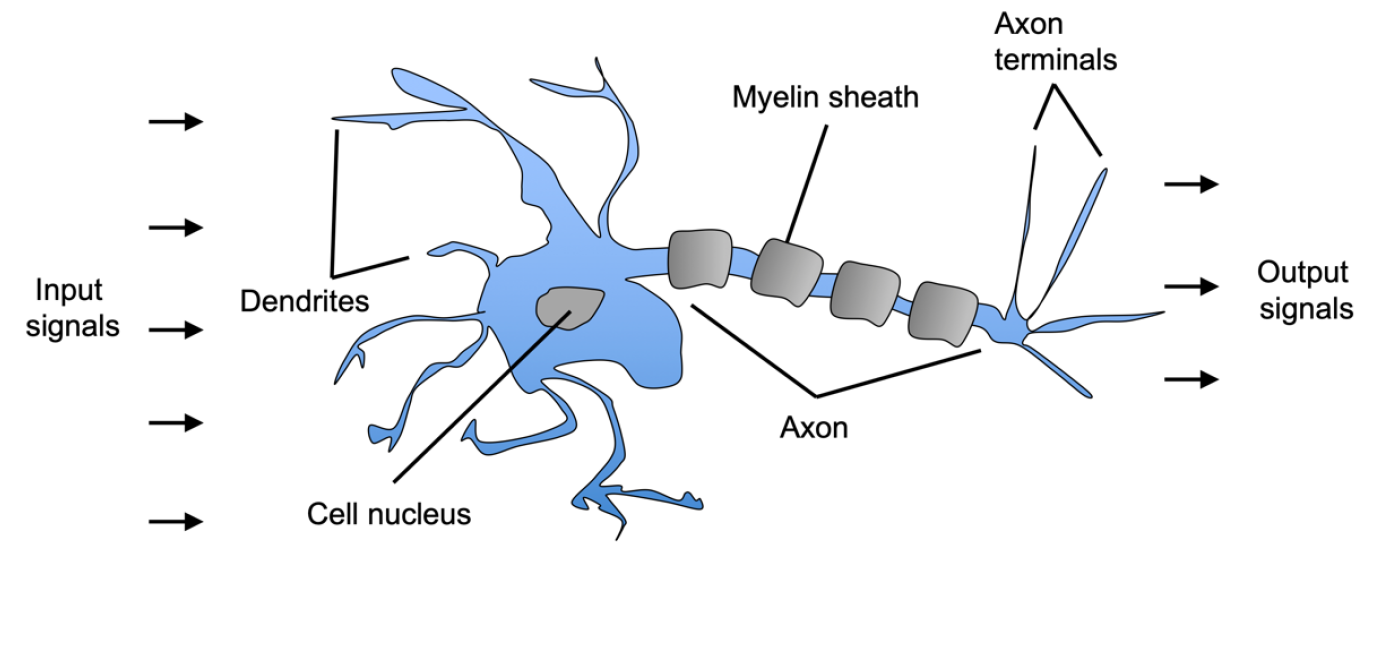

McCulloch et Pitts ont décrit une telle cellule nerveuse comme une simple porte logique avec des sorties binaires ; de multiples signaux arrivent aux dendrites, ils sont ensuite intégrés dans le corps cellulaire et, si le signal accumulé dépasse un certain seuil, un signal de sortie est généré qui sera transmis par l'axone.

## Définition formelle d'un neurone artificiel

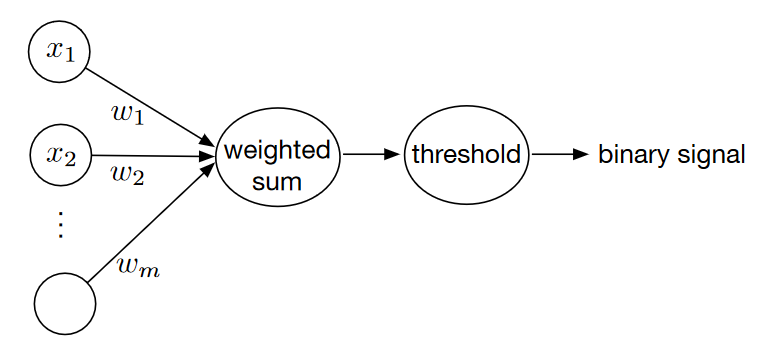

Nous pouvons placer l'idée des neurones artificiels dans le contexte d'une tâche de classification binaire avec deux classes, 0 et 1 : Nous pouvons alors définir une fonction de décision, $\sigma$, qui prend une combinaison linéaire de certaines valeurs d'entrée, $x$, et un vecteur de poids correspondant, $w$, où $z$ est ce que l'on appelle l'entrée du reseau (net input):
$z = w_1x_1 + w_2x_2 + ... + w_mx_m$ :  

$w=	\begin{bmatrix}
		w_1 \\
		... \\
		w_m
	\end{bmatrix},x = \begin{bmatrix}
		x_1 \\
		... \\
		x_m
	\end{bmatrix} $  

 Si l'entrée d'un exemple particulier, $x^{(i)}$, est supérieure à un seuil défini $θ$, nous prédisons la classe 1 et la classe 0 dans le cas contraire. Dans l'algorithme du perceptron, la fonction de décision $\sigma(.)$, est une variante d'une fonction en escalier unitaire (unit step function) :  
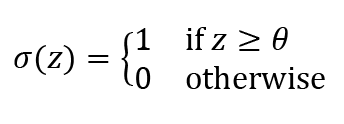


Pour simplifier l'implémentation du code par la suite, nous pouvons modifier cette configuration en quelques étapes.
* Tout d'abord, nous déplaçons le seuil 𝜃 vers le côté gauche de l'équation :  
$ z \ge \theta$  
$ z - \theta \ge 0$    
* nous définissons une unité de biais $b$ et l'intégrons au net input:  

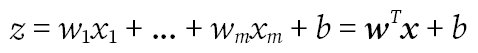
* Troisièmement, compte tenu de l'introduction de l'unité de biais et de la redéfinition du net input $z$ ci-dessus, nous pouvons redéfinir la fonction de décision comme suit :  

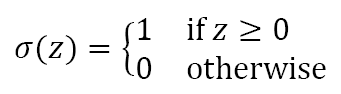



La figure suivante illustre comment l'entrée du reseau $z = w^{T}x + b$ est écrasée en une sortie binaire (0 ou 1) par la fonction de décision du perceptron (sous-figure de gauche) et comment elle peut être utilisée pour discriminer entre deux classes séparables par une limite de décision linéaire (sous-figure de droite):  
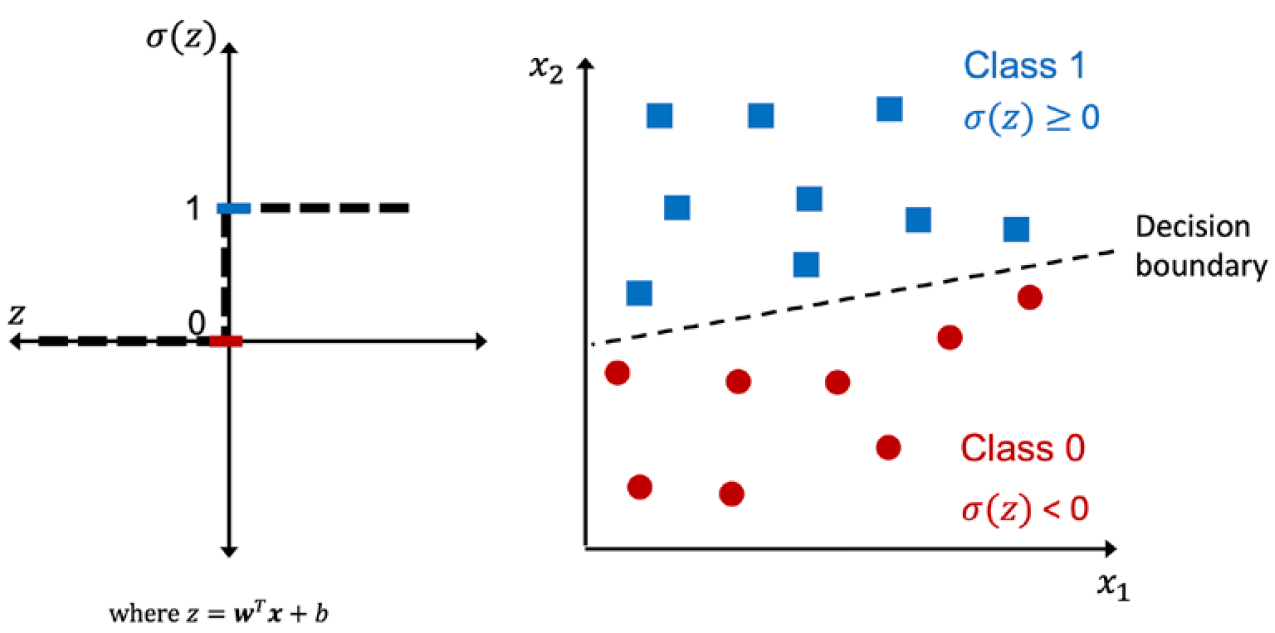

## Règle d'apprentissage du perceptron

L'idée derrière le neurone MCP et le modèle de perceptron à seuil de Rosenblatt est d'utiliser une approche réductionniste pour imiter le fonctionnement d'un seul neurone dans le cerveau : soit il se déclenche, soit il ne se déclenche pas. Ainsi, la règle classique du perceptron de Rosenblatt est relativement simple, et l'algorithme du perceptron peut être résumé par les étapes suivantes :

1.   Initialiser les poids et l'unité de biais à 0 ou à de petits nombres aléatoires.
2.   Pour chaque exemple d'entraînement, $x^{(i)}$ :  
  1. Calculer la valeur de sortie $\hat{y}^{(i)}$.
  2. Mettre à jour les poids et l'unité de biais

Ici, la valeur de sortie est l'étiquette de classe prédite par la fonction de pas unitaire que nous avons définie précédemment, et la mise à jour simultanée de l'unité de biais et de chaque poids, $w_j$, dans le vecteur de poids, w, peut être plus formellement écrite comme suit :  
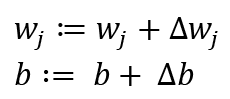  

Les valeurs de mise à jour ("deltas") sont calculées comme suit :  
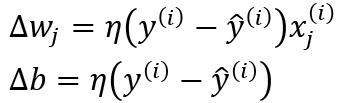  

Notons que, contrairement à l'unité de biais, chaque poids, $w_j$, correspond à une caractéristique, $x_j$, dans l'ensemble de données, qui intervient dans la détermination de la valeur de mise à jour, $Δ𝑤_𝑗$, définie ci-dessus. En outre, 𝜂 est le taux d'apprentissage (généralement une constante entre 0,0 et 1,0), $y^{(i)}$ est la véritable étiquette de classe du $i^{ème}$ exemple d'apprentissage, et $\hat{y}^{(i)}$ est l'étiquette de classe prédite. Il est important de noter que l'unité de biais et tous les poids du vecteur de poids sont mis à jour simultanément, ce qui signifie que nous ne recalculons pas l'étiquette prédite $\hat{y}^{(i)}$ avant que l'unité de biais et tous les poids ne soient mis à jour via les valeurs de mise à jour respectives, $Δ𝑤_𝑗$ et $Δ𝑏$. Concrètement, pour un ensemble de données bidimensionnel, nous pourrions écrire la mise à jour comme suit :  
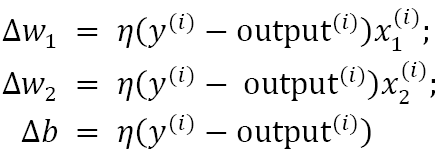



Avant d'implémenter la règle du perceptron en Python, réalisons une simple expérience pour illustrer la simplicité de cette règle d'apprentissage. Dans les deux scénarios où le perceptron prédit correctement l'étiquette de la classe, l'unité de biais et les poids restent inchangés, puisque les valeurs de mise à jour sont de 0 :  
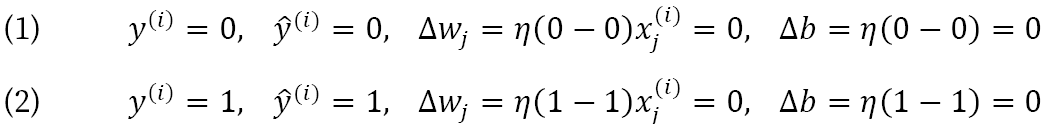

Toutefois, dans le cas d'une prédiction erronée, les poids sont poussés vers la direction de la classe cible positive ou négative :  
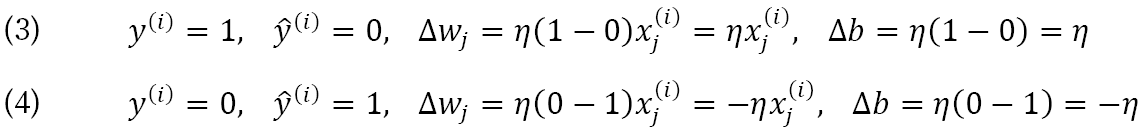

Il est important de noter que la convergence du perceptron n'est garantie que si les deux classes sont linéairement séparables.  
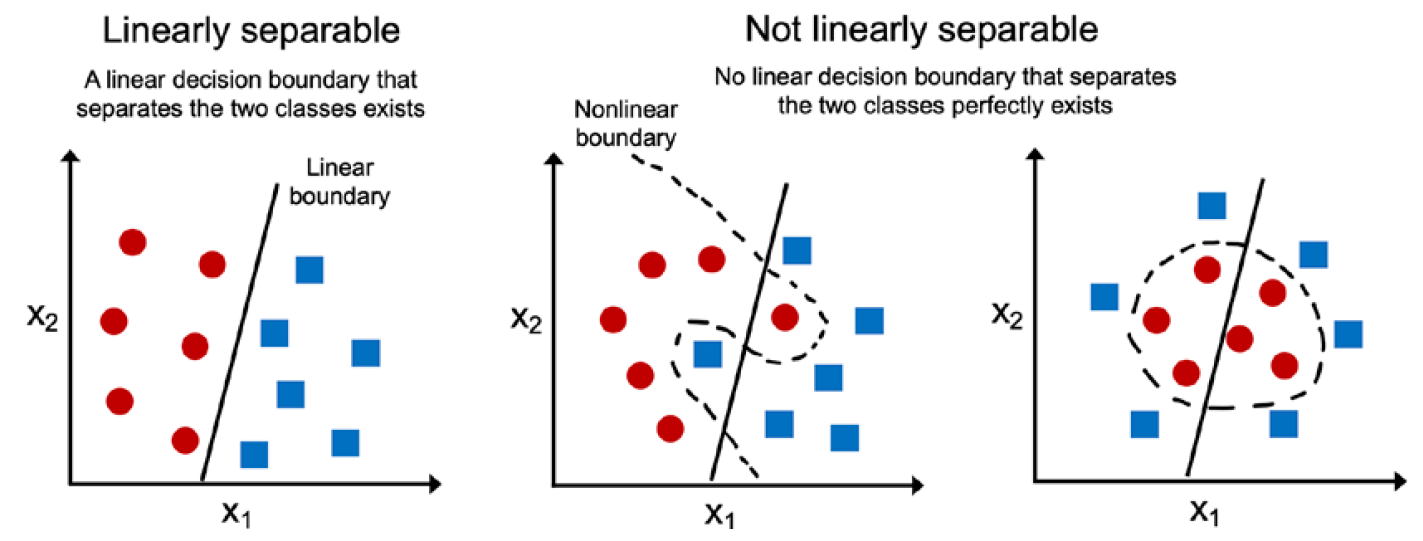

Si les deux classes ne peuvent pas être séparées par une frontière de décision linéaire, nous pouvons fixer un nombre maximum de passes sur l'ensemble de données d'apprentissage ("epochs") et/ou un seuil pour le nombre d'erreurs de classification tolérées - sinon, le perceptron n'arrêterait jamais de mettre à jour les poids.  

Ce que nous venons d'apprendre peut être résumé dans un schéma simple qui illustre le concept général du perceptron :  
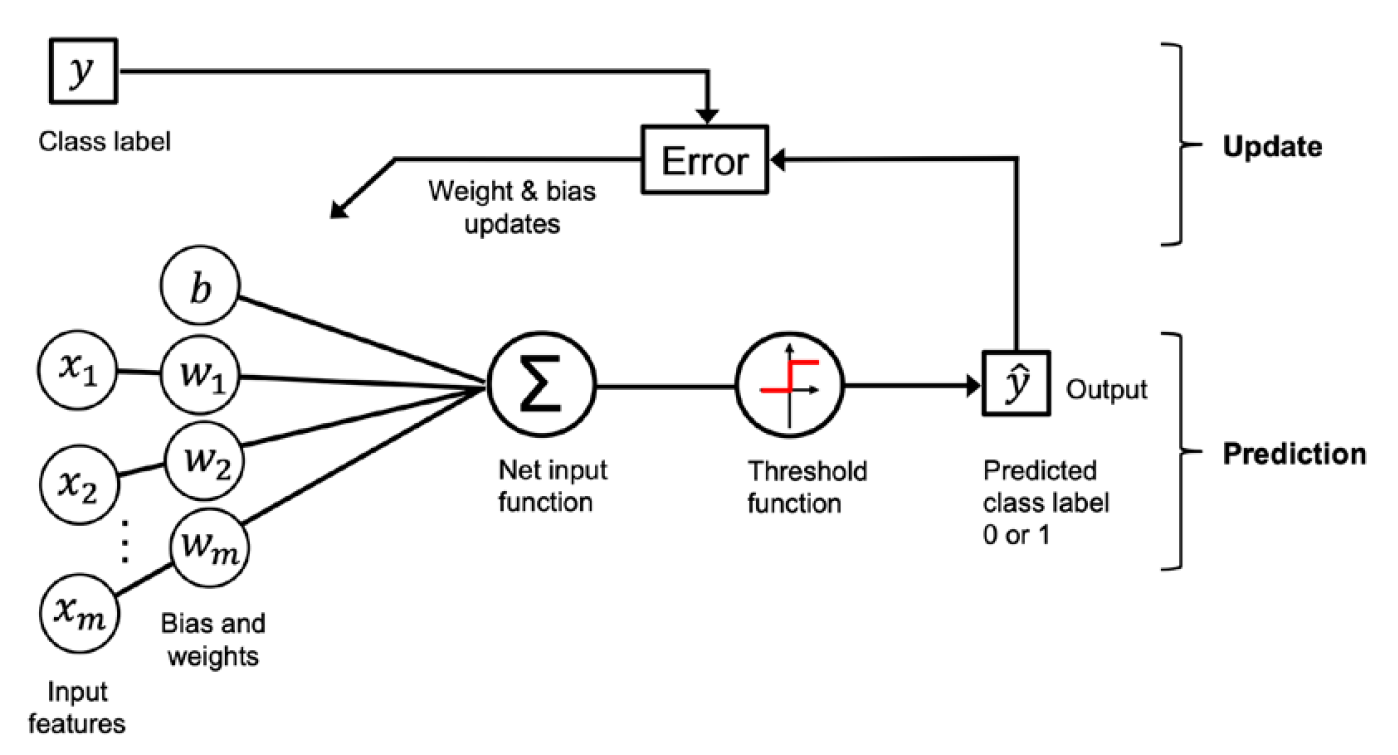

Le diagramme précédent illustre comment le perceptron reçoit les entrées d'un exemple $(x)$ et les combine avec l'unité de biais $(b)$ et les poids $(w)$ pour calculer l'entrée nette (net input). L'entrée nette est ensuite transmise à la fonction de seuil, qui génère une sortie binaire de $0$ ou $1$ - l'étiquette de classe prédite pour l'exemple. Pendant la phase d'apprentissage, cette sortie est utilisée pour calculer l'erreur de prédiction et mettre à jour les poids et l'unité de biais.  


# Implémentation d'un algorithme d'apprentissage perceptron en Python:
Dans la section précédente, nous avons appris comment fonctionne la règle du perceptron de Rosenblatt ; nous allons maintenant l'implémenter en Python et l'appliquer à l'ensemble de données Iris que nous avons présenté au début du cours.

## Une API perceptron orientée objet:
Nous adopterons une approche orientée objet pour définir l'interface du perceptron comme une classe Python, ce qui nous permettra d'initialiser de nouveaux objets `Perceptron` capables d'apprendre à partir de données via une méthode `fit` et de faire des prédictions via une méthode `predict` distincte. Par convention, nous ajoutons un trait de soulignement (_) aux attributs qui ne sont pas créés lors de l'initialisation de l'objet, mais nous le faisons en appelant les autres méthodes de l'objet, par exemple self.w_.   
Voici l'implémentation d'un perceptron en Python :

In [10]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

En utilisant cette implémentation du perceptron, nous pouvons maintenant initialiser de nouveaux objets Perceptron avec un taux d'apprentissage donné, eta (𝜂), et le nombre d'époques, n_iter (passages sur l'ensemble de données d'apprentissage). Par la méthode `fit`, nous initialisons le biais self.b_ à une valeur initiale de 0 et les poids dans self.w_ à un vecteur, $ℝ^{𝑚}$ , où $m$ représente le nombre de dimensions (caractéristiques) dans l'ensemble de données.

Une fois les poids initialisés, la méthode `fit` passe en boucle sur tous les exemples individuels de l'ensemble de données d'apprentissage et met à jour les poids conformément à la règle d'apprentissage du perceptron que nous avons examinée dans la section précédente.  

Les labels de classe sont prédits par la méthode `predict`, qui est appelée dans la méthode `fit` pendant le training pour obtenir le label de classe pour la mise à jour du poids ; mais `predict` peut également être utilisée pour prédire les labels de classe de nouvelles données après que nous ayons ajusté notre modèle. En outre, nous collectons également le nombre d'erreurs de classification à chaque epoch dans la liste `self.errors_` afin de pouvoir analyser ultérieurement les performances de notre perceptron au cours de l'apprentissage. La fonction `np.dot` utilisée dans la méthode `net_input` calcule simplement le produit scalaire $w^Tx + b$.

## Entraînement d'un modèle perceptron sur l'ensemble de données Iris:
Pour tester notre mise en œuvre du perceptron, nous prendrons deux variables caractéristiques (dimensions) de l'ensemble de données Iris, à savoir la longueur des sépales et la longueur des pétales. Pour des raisons pratiques, nous ne prendrons en compte que deux classes de fleurs, setosa et versicolor, de l'ensemble de données Iris - n'oubliez pas que le perceptron est un classificateur binaire.  

Tout d'abord, nous utiliserons la bibliothèque pandas pour charger l'ensemble de données Iris directement dans un objet DataFrame et imprimer les cinq dernières lignes via la méthode tail afin de vérifier que les données ont été chargées correctement :

In [11]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/EMSIMa/ML-DL/main/data/iris.data', header = None, encoding = 'utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Ensuite, nous extrayons les 100 premières étiquettes de classe qui correspondent aux 50 fleurs Iris-setosa et 50 fleurs Iris-versicolor et convertissons les étiquettes de classe en deux étiquettes de classe entières, 1 (versicolor) et 0 (setosa), que nous attribuons à un vecteur, y, où la méthode values d'un DataFrame pandas produit la représentation NumPy correspondante.  

De même, nous extrayons la première colonne de caractéristiques ('Sepal Length') et la troisième colonne de caractéristiques ('Petal Length') de ces 100 exemples d'apprentissage et les assignons à une matrice de caractéristiques, X, que nous pouvons visualiser au moyen d'un scatterplot bidimensionnel :

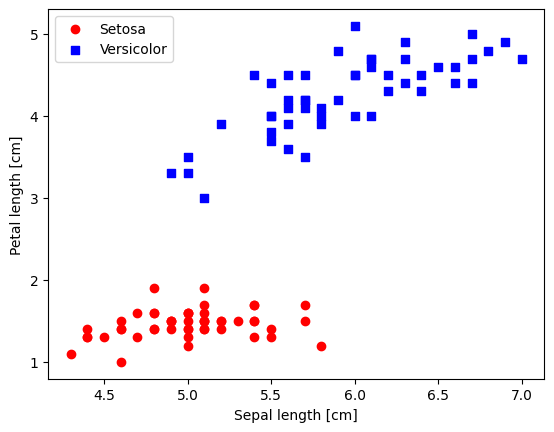

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

Dans ce sous-espace bidimensionnel, nous pouvons voir qu'une limite de décision linéaire devrait suffire à séparer les fleurs setosa des fleurs versicolor. Par conséquent, un classificateur linéaire tel que le perceptron devrait être en mesure de classer parfaitement les fleurs de cet ensemble de données.  

Il est maintenant temps d'entraîner notre algorithme de perceptron sur le sous-ensemble de données d'iris que nous venons d'extraire. Nous tracerons également l'erreur de classification pour chaque epoch afin de vérifier si l'algorithme a convergé et trouvé une frontière de décision qui sépare les deux classes de fleurs d'iris :

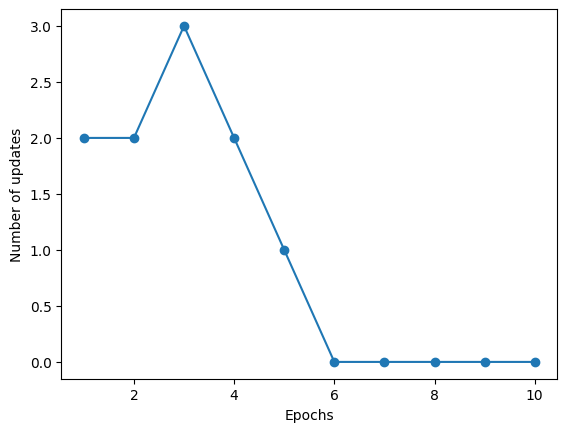

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

Comme nous pouvons le voir, notre perceptron a convergé après le sixième epoch et devrait maintenant être en mesure de classer parfaitement les exemples d'apprentissage. Implémentons une petite fonction de commodité pour visualiser les limites de décision pour les ensembles de données bidimensionnels :

In [14]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

Tout d'abord, nous définissons un certain nombre de couleurs et de marqueurs et créons une carte des couleurs à partir de la liste des couleurs via ListedColormap. Ensuite, nous déterminons les valeurs minimales et maximales pour les deux caractéristiques et utilisons ces vecteurs de caractéristiques pour créer une paire de tableaux de grille, xx1 et xx2, via la fonction NumPy meshgrid. Étant donné que nous avons entraîné notre classificateur perceptron sur deux dimensions de caractéristiques, nous devons aplatir les grilles et créer une matrice ayant le même nombre de colonnes que le sous-ensemble d'entraînement Iris afin de pouvoir utiliser la méthode predict pour prédire les étiquettes de classe, lab, des points de grille correspondants.  

Après avoir restructuré les étiquettes des classes prédites, lab, en une grille ayant les mêmes dimensions que xx1 et xx2, nous pouvons maintenant tracer un graphique en courbes de niveau à l'aide de la fonction contourf de Matplotlib, qui associe les différentes régions de décision à des couleurs différentes pour chaque classe prédite dans le réseau en courbes de niveau :

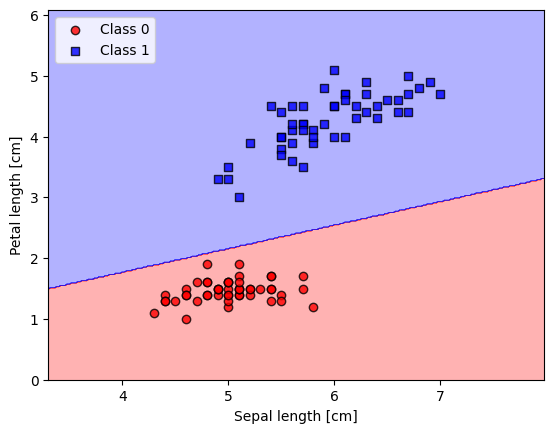

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

Comme le montre le tracé, le perceptron a appris une limite de décision qui permet de classer parfaitement tous les exemples de fleurs dans le sous-ensemble d'apprentissage Iris.  


# Neurones linéaires adaptatifs et convergence de l'apprentissage:

Dans cette section, nous examinerons un autre type de réseau neuronal à couche unique : ADAptive LInear NEuron (Adaline). Adaline a été publié par Bernard Widrow et son doctorant Tedd Hoff quelques années seulement après l'algorithme du perceptron de Rosenblatt, et peut être considéré comme une amélioration de ce dernier.  

L'algorithme Adaline est particulièrement intéressant car il illustre les concepts clés de la définition et de la minimisation des fonctions de perte continues. Il pose les bases de la compréhension d'autres algorithmes d'apprentissage automatique pour la classification, tels que la régression logistique, les machines à vecteurs de support et les réseaux neuronaux multicouches, ainsi que les modèles de régression linéaire, que nous aborderons ultérieurement.  

La principale différence entre la règle d'Adaline (également connue sous le nom de règle de Widrow-Hoff) et le perceptron de Rosenblatt est que les poids sont mis à jour sur la base d'une fonction d'activation linéaire plutôt que sur la base d'une fonction de pas unitaire comme dans le perceptron. Dans Adaline, cette fonction d'activation linéaire, $𝜎(𝑧)$ , est simplement la fonction d'identité de l'entrée du réseau, de sorte que $𝜎(𝑧) = 𝑧$ .  

Bien que la fonction d'activation linéaire soit utilisée pour l'apprentissage des poids, nous utilisons toujours une fonction de seuil pour effectuer la prédiction finale, qui est similaire à la fonction d'échelon unitaire que nous avons abordée précédemment.  

Les principales différences entre le perceptron et l'algorithme Adaline sont mises en évidence dans la figure suivante :  

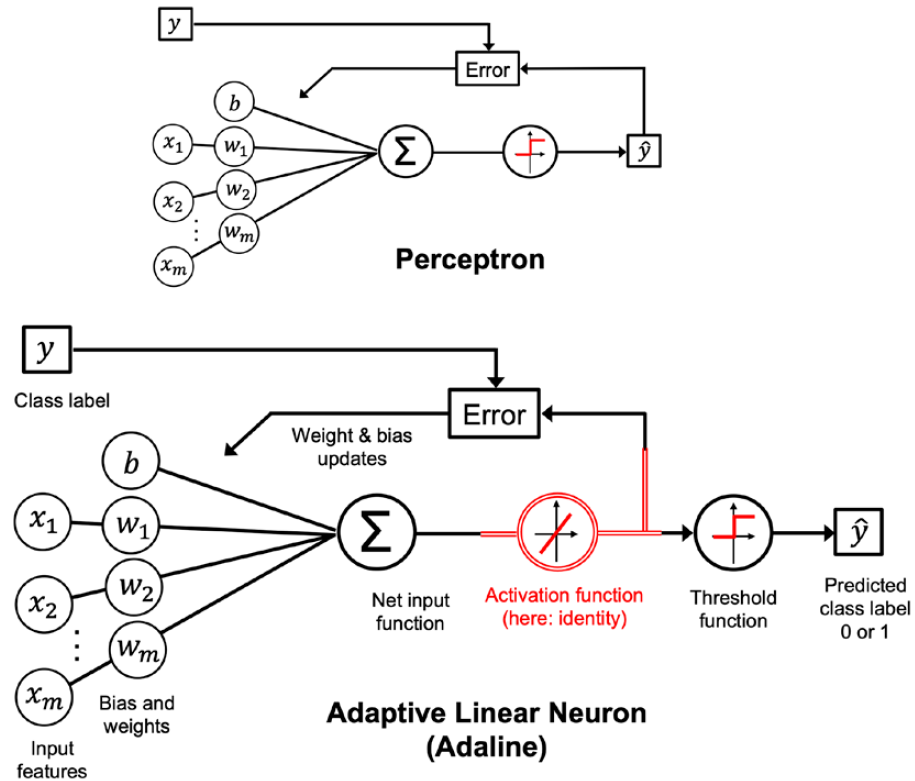  

L'algorithme Adaline compare les vraies étiquettes de classe avec la sortie à valeur continue de la fonction d'activation linéaire pour calculer l'erreur du modèle et mettre à jour les poids. En revanche, le perceptron compare les vraies étiquettes de classe aux étiquettes de classe prédites.


## Minimisation des fonctions de perte par descente de gradient:  

L'un des ingrédients clés des algorithmes d'apprentissage automatique supervisé est une fonction objective définie qui doit être optimisée au cours du processus d'apprentissage. Cette fonction objective est souvent une fonction de perte ou de coût que l'on souhaite minimiser. Dans le cas d'Adaline, nous pouvons définir la fonction de perte $L$ pour apprendre les paramètres du modèle comme l'erreur quadratique moyenne (MSE: Mean Squared Error) entre le résultat calculé et la véritable étiquette de classe :  

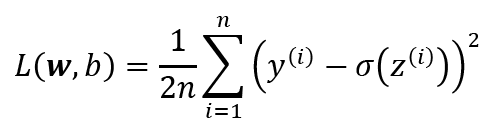

Le terme $1/2$ est simplement ajouté pour notre convenance et facilitera la dérivation du gradient de la fonction de perte par rapport aux paramètres de poids, comme nous le verrons dans les paragraphes suivants. Le principal avantage de cette fonction d'activation linéaire continue, contrairement à la fonction à pas unitaire, est que la fonction de perte devient différentiable. Une autre propriété intéressante de cette fonction de perte est qu'elle est convexe ; ainsi, nous pouvons utiliser un algorithme d'optimisation très simple mais puissant appelé **gradient descent** pour trouver les poids qui minimisent notre fonction de perte afin de classer les exemples de l'ensemble de données Iris.  

Nous pouvons décrire l'idée principale de la descente de gradient comme le fait de descendre une colline jusqu'à ce qu'une perte locale ou globale minimale soit atteinte. À chaque itération, nous faisons un pas dans la direction opposée du gradient, où la taille du pas est déterminée par la valeur du taux d'apprentissage, ainsi que par la pente du gradient (pour plus de simplicité, la figure suivante ne visualise cela que pour un seul poids $w$) :  

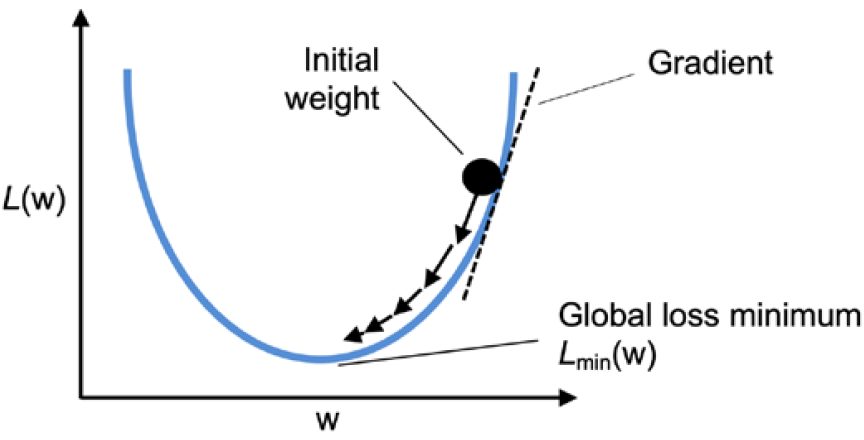

En utilisant la descente de gradient, nous pouvons maintenant mettre à jour les paramètres du modèle en faisant un pas dans la direction opposée du gradient, $∇𝐿(w,b)$, de notre fonction de perte, $L(w, b)$ :  

$w:= w+Δw, b:=b+Δb$  

Les changements de paramètres, $Δ𝒘$ et $Δ𝑏$, sont définis comme le gradient négatif multiplié par le taux d'apprentissage, $𝜂$ :

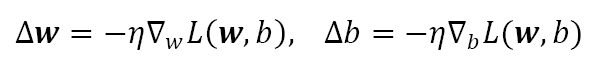  

Pour calculer le gradient de la fonction de perte, nous devons calculer la dérivée partielle de la fonction de perte par rapport à chaque poids, $w_j$ :  

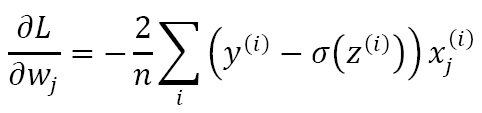  

De même, nous calculons la dérivée partielle de la perte par rapport au biais comme suit :  

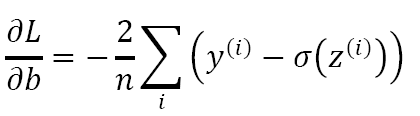

Veuillez noter que le 2 dans le numérateur ci-dessus est simplement un facteur d'échelle constant, et que nous pourrions l'omettre sans affecter l'algorithme. La suppression du facteur d'échelle a le même effet que la modification du taux d'apprentissage par un facteur de 2.  

Nous pouvons donc écrire la mise à jour du poids comme suit :  

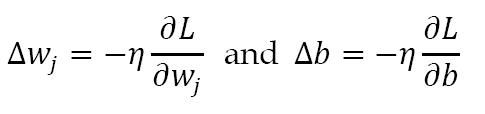  

Puisque nous mettons à jour tous les paramètres simultanément, notre règle d'apprentissage Adaline devient :  

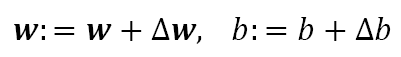  


Bien que la règle d'apprentissage Adaline semble identique à la règle du perceptron, il convient de noter que $𝜎(z^{(𝑖)})$ avec $z^{(𝑖)} = 𝒘^𝑇𝒙^{(𝑖)} + 𝑏$ est un nombre réel et non une étiquette de classe entière. En outre, la mise à jour des poids est calculée sur la base de tous les exemples de l'ensemble de données d'apprentissage (au lieu de mettre à jour les paramètres de manière incrémentielle après chaque exemple d'apprentissage), raison pour laquelle cette approche est également appelée "descente de gradient par lots" (batch gradient descent).

## Implémentation d'Adaline en Python:

La règle du perceptron et Adaline étant très similaires, nous reprendrons l'implémentation du perceptron que nous avons définie précédemment et nous modifierons la méthode `fit` de manière à ce que les paramètres de poids et de biais soient désormais mis à jour en minimisant la fonction de perte par descente de gradient :

In [17]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,
            # in the case of logistic regression (as we will see later),
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

Au lieu de mettre à jour les poids après avoir évalué chaque exemple d'apprentissage individuel, comme dans le perceptron, nous calculons le gradient sur la base de l'ensemble des données d'apprentissage. Pour l'unité de biais, cela se fait via `self. eta * 2.0 * errors.mean()`, où errors est un tableau contenant les valeurs de dérivées partielles $𝜕/𝜕b$.  

Pour implémenter la mise à jour des poids plus efficacement sans utiliser une boucle for, nous pouvons utiliser une multiplication matrice-vecteur entre notre matrice de caractéristiques et le vecteur d'erreur.  

`self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]`  

Veuillez noter que la méthode d'activation n'a aucun effet sur le code puisqu'il s'agit simplement d'une fonction d'identité. Nous avons ajouté la fonction d'activation (calculée via la méthode d'activation) pour illustrer le concept général relatif à la manière dont l'information circule dans un réseau neuronal monocouche : caractéristiques des données d'entrée, entrée du réseau, activation et sortie.  

Dans le prochain chapitre, nous découvrirons un classificateur de régression logistique qui utilise une fonction d'activation non identitaire et non linéaire. Nous verrons qu'un modèle de régression logistique est étroitement lié à Adaline, la seule différence étant sa fonction d'activation et de perte.  

Comme pour l'implémentation précédente du perceptron, nous rassemblons les valeurs de perte dans une liste self.losses_ afin de vérifier si l'algorithme a convergé après l'apprentissage.  

Dans la pratique, il faut souvent expérimenter pour trouver un bon taux d'apprentissage, $𝜂$ pour une convergence optimale. Choisissons donc deux taux d'apprentissage différents, $𝜂=0.1$ et $𝜂 = 0.0001$ , pour commencer et traçons les fonctions de perte en fonction du nombre d'epochs pour voir dans quelle mesure l'implémentation d'Adaline apprend à partir des données d'apprentissage.  

Représentons maintenant la perte en fonction du nombre d'époques pour les deux taux d'apprentissage différents :

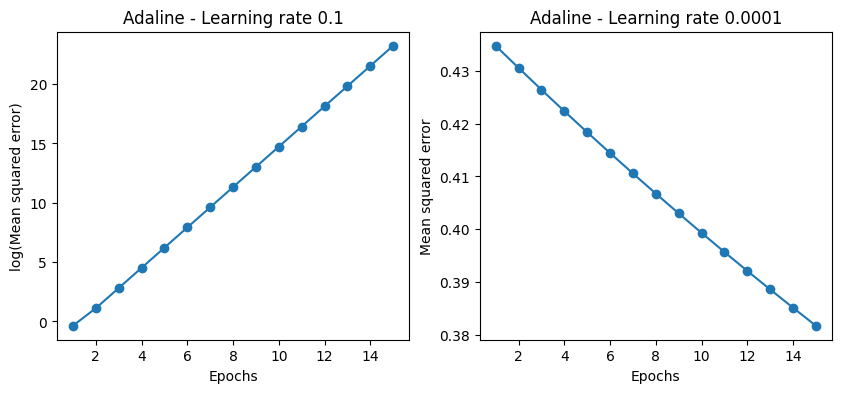

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

Comme nous pouvons le voir dans les graphiques de la fonction de perte résultante, nous avons rencontré deux types de problèmes différents. Le graphique de gauche montre ce qui pourrait se produire si nous choisissions un taux d'apprentissage trop élevé. Au lieu de minimiser la fonction de perte, le MSE devient plus important à chaque époque, car nous dépassons le minimum global. D'autre part, nous pouvons voir que la perte diminue sur le graphique de droite, mais le taux d'apprentissage choisi $\eta = 0.0001$ , est si petit que l'algorithme aurait besoin d'un très grand nombre d'époques pour converger vers le minimum global de perte.  

La figure suivante illustre ce qui peut se passer si nous modifions la valeur du taux d'apprentissage pour minimiser la fonction de perte $L$. La sous-figure de gauche illustre le cas d'un taux d'apprentissage bien choisi, où la perte diminue progressivement, en se déplaçant dans la direction du minimum global. La sous-figure de droite, en revanche, illustre ce qui se passe si nous choisissons un taux d'apprentissage trop élevé - nous dépassons le minimum global :  

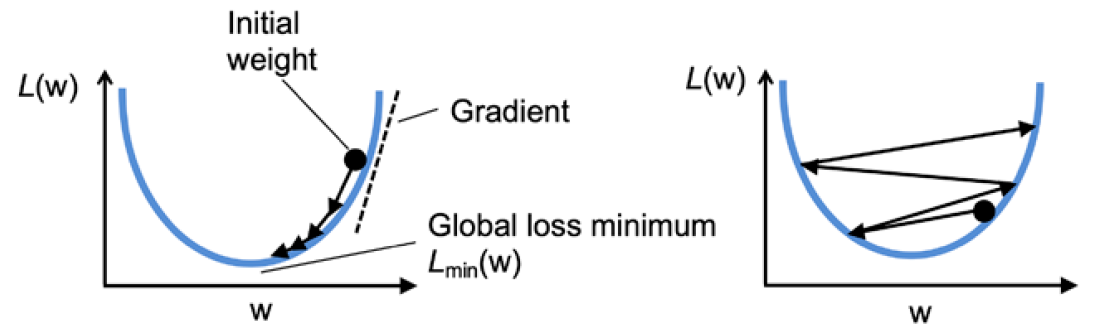

## Amélioration de la descente de gradient par la mise à l'échelle des caractéristiques (feature scaling):

La descente de gradient est l'un des nombreux algorithmes qui bénéficient de la mise à l'échelle des caractéristiques. Dans cette section, nous utiliserons une méthode de mise à l'échelle des caractéristiques appelée standardisation. Cette procédure de standardisation permet à l'apprentissage par descente de gradient de converger plus rapidement ; cependant, elle ne rend pas l'ensemble de données original normalement distribué. La standardisation déplace la moyenne de chaque caractéristique de manière à ce qu'elle soit centrée sur zéro et que chaque caractéristique ait un écart type de 1 (variance unitaire). Par exemple, pour normaliser la jème caractéristique, il suffit de soustraire la moyenne de l'échantillon, $𝜇_𝑗$, de chaque exemple d'apprentissage et de la diviser par son écart type, $𝜎_𝑗$ :  

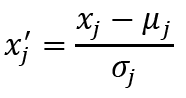  

Ici, $x_j$ est un vecteur composé des valeurs de la $j^{ème}$ caractéristique de tous les exemples d'apprentissage $n$ et cette technique de standardisation est appliquée à chaque caractéristique $j$ dans notre ensemble de données.  

L'une des raisons pour lesquelles la standardisation facilite l'apprentissage par descente de gradient est qu'il est plus facile de trouver un taux d'apprentissage qui fonctionne bien pour tous les poids (et le biais). Si les caractéristiques sont à des échelles très différentes, un taux d'apprentissage qui fonctionne bien pour mettre à jour un poids peut être trop grand ou trop petit pour mettre à jour l'autre poids de la même manière. Dans l'ensemble, l'utilisation de caractéristiques normalisées peut stabiliser l'apprentissage de sorte que l'optimiseur doive passer par moins d'étapes pour trouver une bonne solution ou une solution optimale (le minimum de perte globale). La figure suivante illustre les mises à jour possibles du gradient avec des caractéristiques non normalisées (à gauche) et des caractéristiques normalisées (à droite), où les cercles concentriques représentent la surface de perte en fonction de deux poids de modèle dans un problème de classification bidimensionnel :  

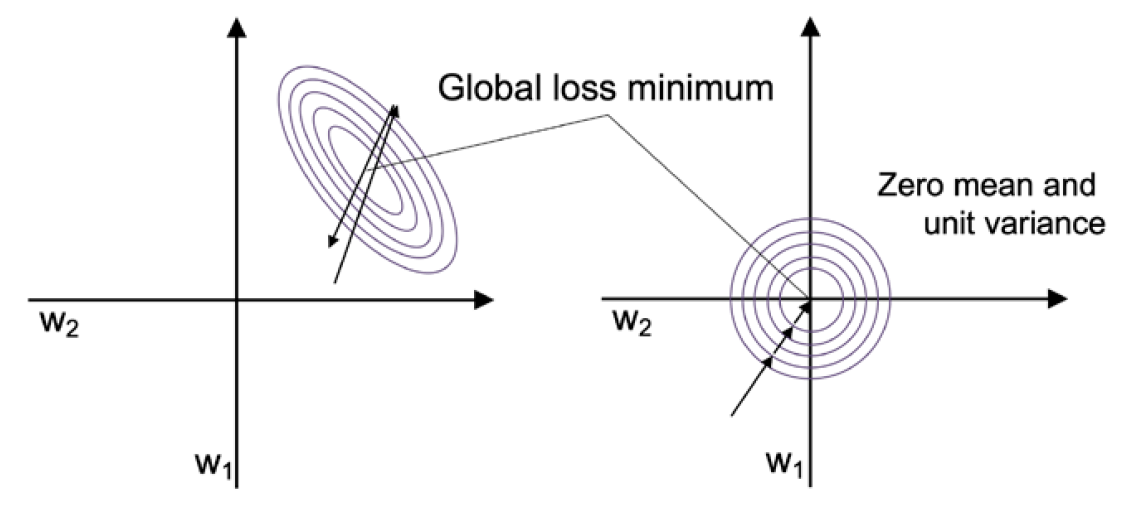

La standardisation peut être facilement réalisée en utilisant les méthodes intégrées NumPy `mean` et `std` :

In [19]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

Après la standardisation, nous entraînons à nouveau Adaline et nous constatons qu'il converge maintenant après un petit nombre d'epochs en utilisant un taux d'apprentissage de $𝜂=0.5$ :

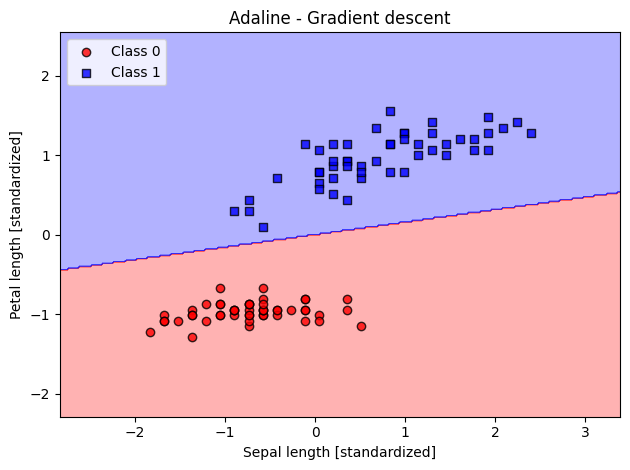

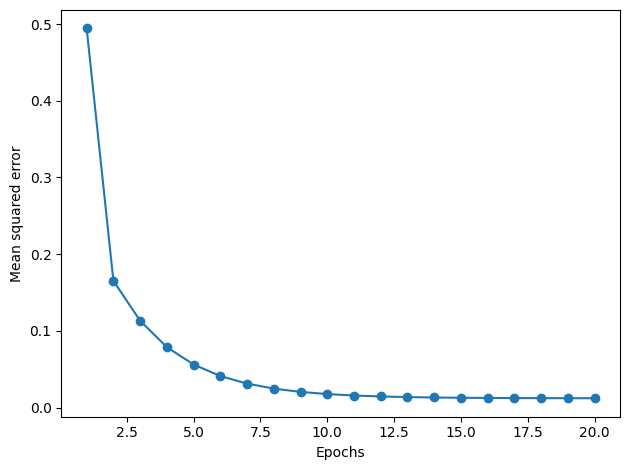

In [20]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
plt.show()

Comme nous pouvons le voir sur les graphiques, Adaline a maintenant convergé après l'entraînement sur les caractéristiques standardisées.

## Apprentissage automatique à grande échelle et descente de gradient stochastique (Stochastic Gradient Descent):  

Dans la section précédente, nous avons appris à minimiser une fonction de perte en faisant un pas dans la direction opposée du gradient de perte calculé à partir de l'ensemble des données d'apprentissage ; c'est pourquoi cette approche est parfois appelée 'full batch gradient descent' (descente de gradient par lots complets). Imaginons maintenant que nous disposons d'un très grand ensemble de données comprenant des millions de points de données, ce qui n'est pas rare dans de nombreuses applications d'apprentissage automatique. L'exécution de la descente de gradient par lots complets peut s'avérer très coûteuse en termes de calcul dans de tels scénarios, car nous devons réévaluer l'ensemble des données d'apprentissage à chaque fois que nous faisons un pas vers le minimum global.  

Une alternative populaire à l'algorithme de descente de gradient par lots est la descente de gradient stochastique (SGD), parfois également appelée descente de gradient itérative ou "online". Au lieu de mettre à jour les poids sur la base de la somme des erreurs accumulées sur tous les exemples d'apprentissage, $x^{(i)}$ :  
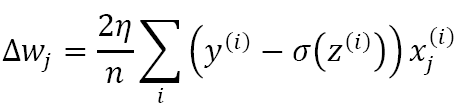  

nous mettons à jour les paramètres de manière incrémentale pour chaque exemple d'apprentissage, par exemple :  

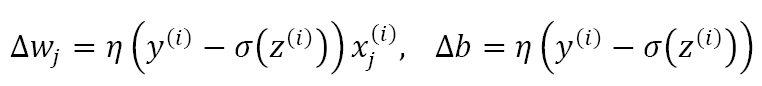  

Bien que la méthode SGD puisse être considérée comme une approximation de la descente de gradient, elle atteint généralement la convergence beaucoup plus rapidement en raison des mises à jour plus fréquentes des poids. Comme chaque gradient est calculé sur la base d'un seul exemple d'apprentissage, la surface d'erreur est plus bruyante que dans le cas de la descente de gradient, ce qui peut également présenter l'avantage de permettre à SGD d'échapper plus facilement aux minima locaux peu profonds si l'on travaille avec des fonctions de perte non linéaires. Pour obtenir des résultats satisfaisants avec la SGD, il est important de présenter les données d'apprentissage dans un ordre aléatoire ; nous voulons également mélanger l'ensemble des données d'apprentissage pour chaque période afin d'éviter les cycles.  

Un autre avantage du SGD est qu'il peut être utilisé pour l'apprentissage online. Dans le cadre de l'apprentissage online, notre modèle est entraîné à la volée au fur et à mesure de l'arrivée de nouvelles données d'entraînement. Cette méthode est particulièrement utile si nous accumulons de grandes quantités de données, par exemple les données des clients dans les applications web. Grâce à l'apprentissage en ligne, le système peut s'adapter immédiatement aux changements et les données d'apprentissage peuvent être supprimées après la mise à jour du modèle si l'espace de stockage est un problème.  

Puisque nous avons déjà implémenté la règle d'apprentissage Adaline en utilisant la descente de gradient, il nous suffit de faire quelques ajustements pour modifier l'algorithme d'apprentissage afin de mettre à jour les poids via SGD. Dans la méthode `fit`, nous mettrons désormais à jour les poids après chaque exemple d'apprentissage. En plus, nous implémenterons une méthode partial_fit supplémentaire, qui ne réinitialise pas les poids, pour l'apprentissage en ligne. Afin de vérifier si notre algorithme a convergé après l'apprentissage, nous calculerons la perte comme étant la perte moyenne des exemples d'apprentissage à chaque epoch. Nous ajouterons également une option permettant de mélanger les données d'entraînement avant chaque époque afin d'éviter les cycles répétitifs lors de l'optimisation de la fonction de perte ; le paramètre random_state permet de spécifier une graine aléatoire à des fins de reproductibilité :  

In [21]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

La méthode _shuffle que nous utilisons maintenant dans le classificateur AdalineSGD fonctionne comme suit : via la fonction de permutation de np.random, nous générons une séquence aléatoire de nombres uniques compris entre 0 et 100. Ces nombres peuvent ensuite être utilisés comme indices pour mélanger notre matrice de caractéristiques et notre vecteur d'étiquettes de classe.  

Nous pouvons ensuite utiliser la méthode `fit` pour entraîner le classificateur AdalineSGD et utiliser notre `plot_decision_regions` pour représenter les résultats de l'entraînement :  

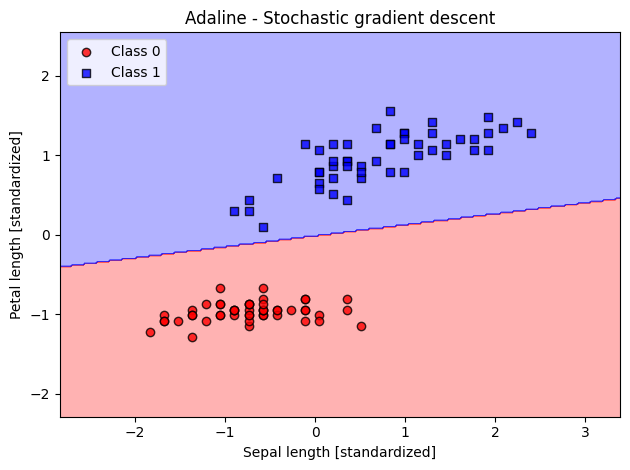

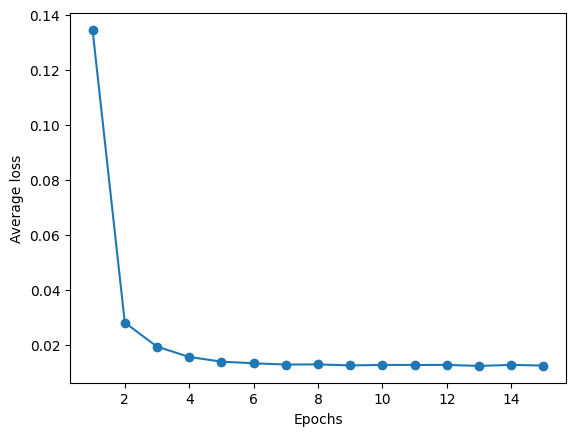

In [23]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

plt.show()

Comme vous pouvez le voir, la perte moyenne diminue assez rapidement et la frontière de décision finale après 15 epochs ressemble à la descente de gradient par lots d'Adaline. Si nous voulons mettre à jour notre modèle, par exemple, dans un scénario d'apprentissage en ligne avec des données en continu, nous pouvons simplement appeler la méthode partial_fit sur des exemples d'apprentissage individuels, par exemple:  

`ada_sgd.partial_fit(X_std[0, :], y[0])`

# Conclusion:  

Dans ce chapitre, nous avons acquis une bonne compréhension des concepts de base des classificateurs linéaires pour l'apprentissage supervisé. Après avoir implémenté un perceptron, nous avons vu comment nous pouvons entraîner efficacement des neurones linéaires adaptatifs via une implémentation vectorisée de la descente de gradient et de l'apprentissage en ligne via SGD.  

Maintenant que nous avons vu comment mettre en œuvre des classificateurs simples en Python, nous sommes prêts à passer au chapitre suivant, où nous utiliserons la bibliothèque d'apprentissage automatique scikit-learn de Python pour accéder à des classificateurs d'apprentissage automatique plus avancés et plus puissants, qui sont couramment utilisés dans le monde universitaire ainsi que dans l'industrie.  

L'approche orientée objet que nous avons utilisée pour implémenter les algorithmes perceptron et Adaline nous aidera à comprendre l'API scikit-learn, qui est implémentée sur la base des mêmes concepts fondamentaux que ceux que nous avons utilisés dans ce chapitre : les méthodes fit et predict. Sur la base de ces concepts fondamentaux, nous découvrirons la régression logistique pour modéliser les probabilités de classe et les machines à vecteurs de support pour travailler avec des limites de décision non linéaires. En plus, nous verrons une autre classe d'algorithmes d'apprentissage supervisé, les algorithmes à base d'arbres, qui sont couramment combinés dans des classificateurs d'ensemble robustes.